# Credit Card Lead Prediction

In [1]:
## Import the Required Libraries

import pandas as pd
import numpy as np

## for graphs / visualization
import matplotlib.pyplot as plt
import seaborn as sns

## for categorical feature encoding
from sklearn.preprocessing import LabelEncoder

##ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Load datasets

train_df = pd.read_csv('train_data.csv')
test_df  = pd.read_csv('test_data.csv')

In [3]:
## Display initial few lines

train_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [4]:
## Display initial few lines

test_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


### add new column to identify the data source files of the records

In [5]:
train_df['data_file'] = 'train'
test_df['data_file']  = 'test'

### combine the two dataframes so that data cleaning operations can be performed for everything together

In [6]:
frames = [train_df, test_df]
new_df = pd.concat(frames)
new_df.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,data_file
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0.0,train
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0.0,train
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0.0,train
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0.0,train
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0.0,train


### describe datasets - numeric features

In [7]:
train_df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [8]:
test_df.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


In [9]:
new_df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,351037.000000,351037.000000,3.510370e+05,245725.000000
mean,43.860716,46.924244,1.130141e+06,0.237208
std,14.841932,32.329303,8.569530e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.041850e+05,0.000000
50%,43.000000,32.000000,8.951620e+05,0.000000
75%,54.000000,73.000000,1.368152e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


### describe datasets - categorical features

In [10]:
train_df.describe(include='O')

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,data_file
count,245725,245725,245725,245725,245725,216400,245725,245725
unique,245725,2,35,4,4,2,2,1
top,QPXEQBTM,Male,RG268,Self_Employed,X1,No,No,train
freq,1,134197,35934,100886,103718,144357,150290,245725


In [11]:
test_df.describe(include='O')

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,data_file
count,105312,105312,105312,105312,105312,92790,105312,105312
unique,105312,2,35,4,4,2,2,1
top,6HGS2GUW,Male,RG268,Self_Employed,X1,No,No,test
freq,1,57705,15125,43192,44484,61608,63797,105312


In [12]:
new_df.describe(include='O')

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active,data_file
count,351037,351037,351037,351037,351037,309190,351037,351037
unique,351037,2,35,4,4,2,2,2
top,QPXEQBTM,Male,RG268,Self_Employed,X1,No,No,train
freq,1,191902,51059,144078,148202,205965,214087,245725


In [13]:
# locate the columns with null values

new_df.isnull().any()

ID                     False
Gender                 False
Age                    False
Region_Code            False
Occupation             False
Channel_Code           False
Vintage                False
Credit_Product          True
Avg_Account_Balance    False
Is_Active              False
Is_Lead                 True
data_file              False
dtype: bool

In [14]:
# count of non null records

new_df.notnull().sum()

ID                     351037
Gender                 351037
Age                    351037
Region_Code            351037
Occupation             351037
Channel_Code           351037
Vintage                351037
Credit_Product         309190
Avg_Account_Balance    351037
Is_Active              351037
Is_Lead                245725
data_file              351037
dtype: int64

### identify column names with null values

In [15]:
train_df.columns[train_df.isnull().any()]

Index(['Credit_Product'], dtype='object')

In [16]:
test_df.columns[test_df.isnull().any()]

Index(['Credit_Product'], dtype='object')

In [17]:
new_df.columns[new_df.isnull().any()]

Index(['Credit_Product', 'Is_Lead'], dtype='object')

### count of records with null values in the Credit_Product column

In [18]:
new_df.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
data_file                   0
dtype: int64

In [19]:
train_df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
data_file                  0
dtype: int64

In [20]:
test_df.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
data_file                  0
dtype: int64

#### expectedly, the combined dataframe is showing 'Is_Lead' column having NULL values - This column is NOT present in test dataset. So, while combining the dataframes, the default value being populated as NULL

## Exploratory Data Analysis with Visuals

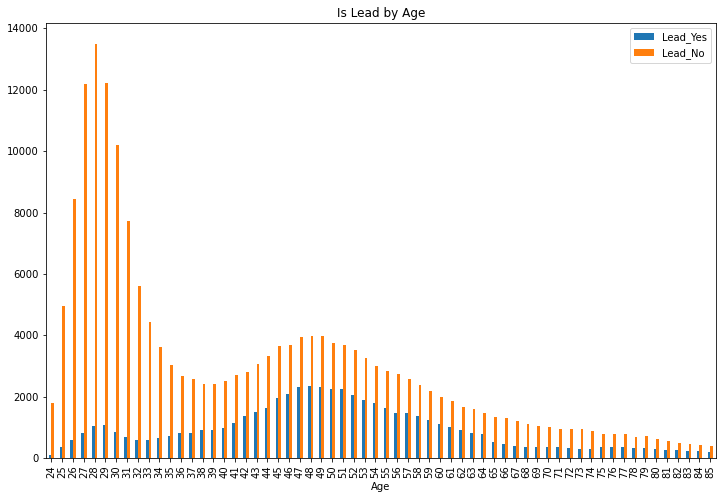

In [21]:
temp_df = pd.DataFrame()

temp_df['Lead_Yes'] = new_df[new_df.Is_Lead==1.0]['Age'].value_counts().sort_index()
temp_df['Lead_No'] = new_df[new_df.Is_Lead==0.0]['Age'].value_counts().sort_index()

temp_df.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Age')
plt.title('Is Lead by Age')
plt.show()

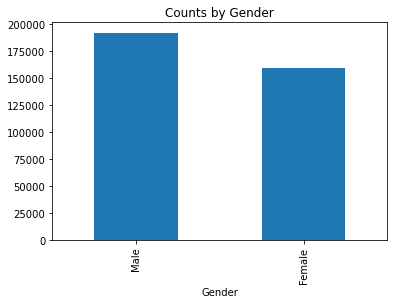

In [22]:
new_df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.title('Counts by Gender')
plt.show()

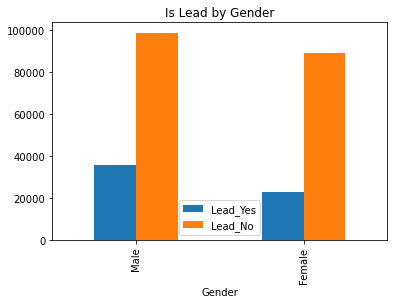

In [23]:
temp_df = pd.DataFrame()

temp_df['Lead_Yes'] = new_df[new_df.Is_Lead==1.0]['Gender'].value_counts()
temp_df['Lead_No'] = new_df[new_df.Is_Lead==0.0]['Gender'].value_counts()

temp_df.plot(kind='bar')
plt.xlabel('Gender')
plt.title('Is Lead by Gender')
plt.show()

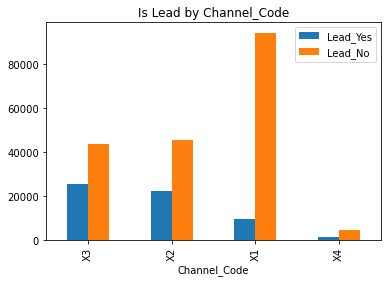

In [24]:
temp_df = pd.DataFrame()

temp_df['Lead_Yes'] = new_df[new_df.Is_Lead==1.0]['Channel_Code'].value_counts()
temp_df['Lead_No'] = new_df[new_df.Is_Lead==0.0]['Channel_Code'].value_counts()

temp_df.plot(kind='bar')
plt.xlabel('Channel_Code')
plt.title('Is Lead by Channel_Code')
plt.show()

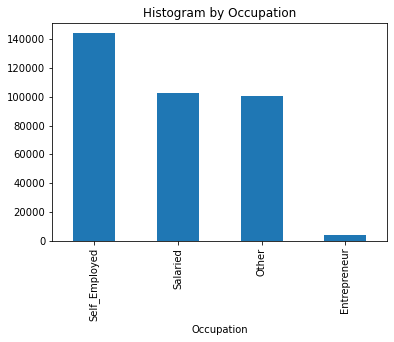

In [25]:
new_df['Occupation'].value_counts().plot(kind='bar')
plt.xlabel('Occupation')
plt.title('Histogram by Occupation')
plt.show()

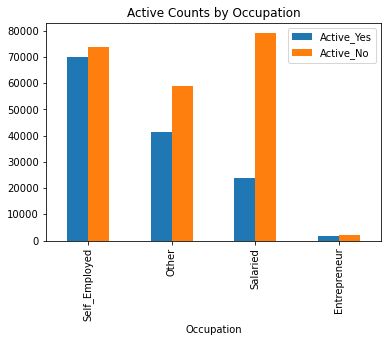

In [26]:
temp_df = pd.DataFrame()

temp_df['Active_Yes'] = new_df[new_df.Is_Active=='Yes']['Occupation'].value_counts()
temp_df['Active_No'] = new_df[new_df.Is_Active=='No']['Occupation'].value_counts()

temp_df.plot(kind='bar')
plt.xlabel('Occupation')
plt.title('Active Counts by Occupation')
plt.show()

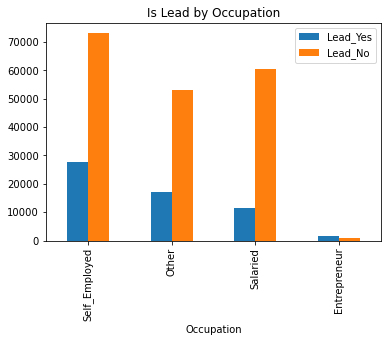

In [27]:
temp_df = pd.DataFrame()

temp_df['Lead_Yes'] = new_df[new_df.Is_Lead==1.0]['Occupation'].value_counts()
temp_df['Lead_No'] = new_df[new_df.Is_Lead==0.0]['Occupation'].value_counts()

temp_df.plot(kind='bar')
plt.xlabel('Occupation')
plt.title('Is Lead by Occupation')
plt.show()

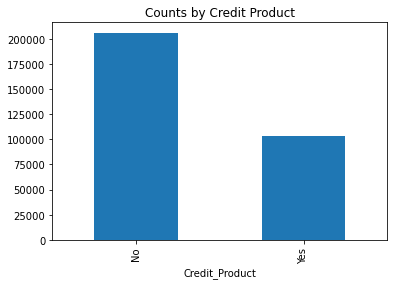

In [28]:
new_df['Credit_Product'].value_counts().plot(kind='bar')
plt.xlabel('Credit_Product')
plt.title('Counts by Credit Product')
plt.show()

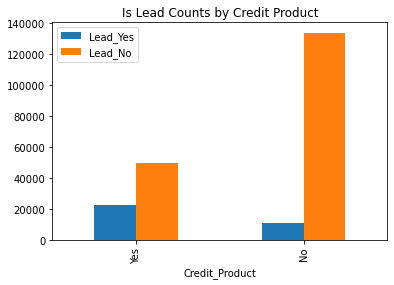

In [29]:
temp_df = pd.DataFrame()

temp_df['Lead_Yes'] = new_df[new_df.Is_Lead==1.0]['Credit_Product'].value_counts()
temp_df['Lead_No'] = new_df[new_df.Is_Lead==0.0]['Credit_Product'].value_counts()

temp_df.plot(kind='bar')
plt.xlabel('Credit_Product')
plt.title('Is Lead Counts by Credit Product')
plt.show()

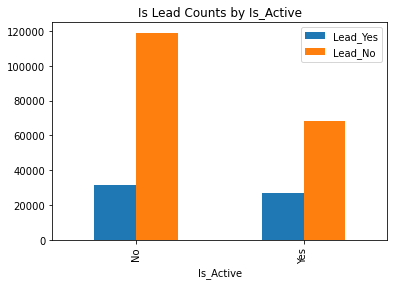

In [30]:
temp_df = pd.DataFrame()

temp_df['Lead_Yes'] = new_df[new_df.Is_Lead==1.0]['Is_Active'].value_counts()
temp_df['Lead_No'] = new_df[new_df.Is_Lead==0.0]['Is_Active'].value_counts()

temp_df.plot(kind='bar')
plt.xlabel('Is_Active')
plt.title('Is Lead Counts by Is_Active')
plt.show()

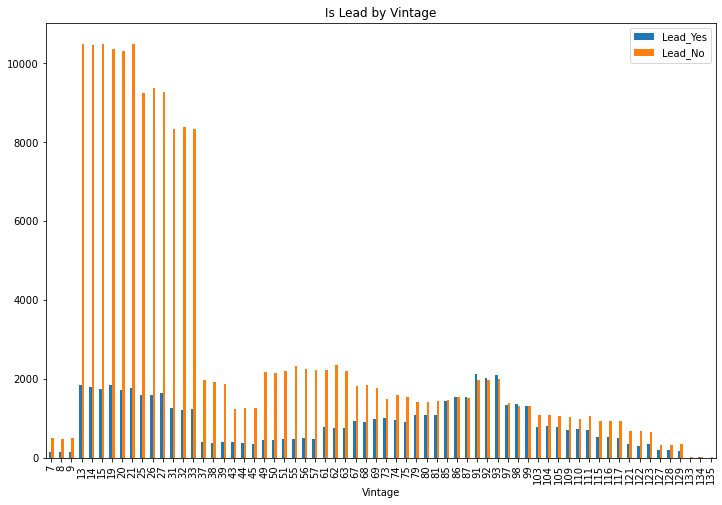

In [31]:
temp_df = pd.DataFrame()

temp_df['Lead_Yes'] = new_df[new_df.Is_Lead==1.0]['Vintage'].value_counts().sort_index()
temp_df['Lead_No'] = new_df[new_df.Is_Lead==0.0]['Vintage'].value_counts().sort_index()

temp_df.plot(kind='bar', figsize=(12, 8))
plt.xlabel('Vintage')
plt.title('Is Lead by Vintage')
plt.show()

In [32]:
temp_df  = pd.DataFrame()

temp_df['Is_Lead']  = new_df['Is_Lead']
temp_df['Avg_Account_Balance'] = np.log10(new_df['Avg_Account_Balance'])

temp_df.head()

,Is_Lead,Avg_Account_Balance
0,0.0,6.019405
1,0.0,5.764914
2,0.0,6.171526
3,0.0,5.672517
4,0.0,5.947819


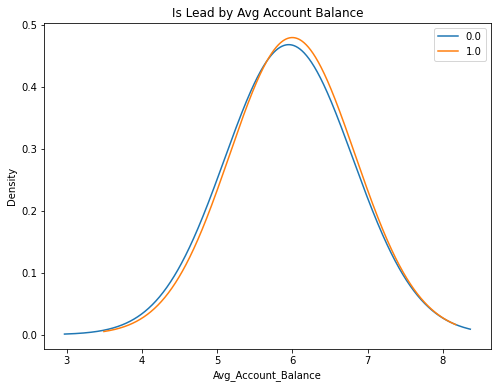

In [33]:
temp_df.groupby('Is_Lead')['Avg_Account_Balance'].plot.kde(bw_method=3, legend=True, figsize=(8,6)) 
plt.xlabel('Avg_Account_Balance')
plt.title('Is Lead by Avg Account Balance')
plt.show()

## Data cleaning and preparation

### Filling in NULL values / dropping records with NULL values

In [34]:
#new_df['Is_Lead'] = new_df['Is_Lead'].fillna(99)
new_df['Credit_Product'] = new_df['Credit_Product'].fillna('No')

#new_df2 = new_df[((new_df.data_file=='train') & (new_df.Credit_Product.notnull())) | (new_df.data_file=='test')]

#new_df = pd.DataFrame()

#new_df = new_df2

In [35]:
## Ensure the records with NULL values for Credit_Product feature are having default values
new_df.isnull().sum()

ID                          0
Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
data_file                   0
dtype: int64

In [36]:
new_df.notnull().sum()

ID                     351037
Gender                 351037
Age                    351037
Region_Code            351037
Occupation             351037
Channel_Code           351037
Vintage                351037
Credit_Product         351037
Avg_Account_Balance    351037
Is_Active              351037
Is_Lead                245725
data_file              351037
dtype: int64

### Binary values features converted into numerical ones

### Target variable - 'Is_Lead' is already having float values, in the train_df

In [37]:
new_df['Is_Active'].replace(['Yes','No'],[1,0], inplace=True)
new_df['Is_Active'] = new_df['Is_Active'].astype(float)

### Categorical features - label encoding

In [38]:
## creating label encoder instance
le = LabelEncoder()

## list of useful categorical features columns, identified in the describe() function earlier
## we will not use 'ID' column - unique customer identification and 'data_file' column, which is used to know data source

cat_cols = ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product']

In [39]:
#new_df2 = new_df

for col in cat_cols:
    new_df[col] = le.fit_transform(new_df[col])

In [40]:
new_df.drop(columns = ['ID'], inplace=True)

In [41]:
new_df.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,data_file
0,0,73,18,1,2,43,0,1045696,0.0,0.0,train
1,0,30,27,2,0,32,0,581988,0.0,0.0,train
2,0,56,18,3,2,26,0,1484315,1.0,0.0,train
3,1,34,20,2,0,19,0,470454,0.0,0.0,train
4,0,30,32,2,0,33,0,886787,0.0,0.0,train


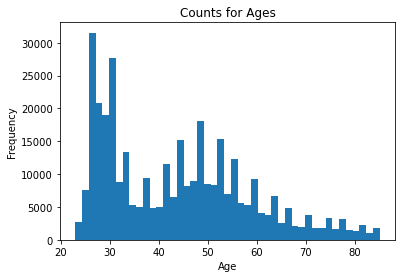

In [42]:
new_df['Age'].plot.hist(bins=45)
plt.xlabel('Age')
plt.title('Counts for Ages')
plt.show()

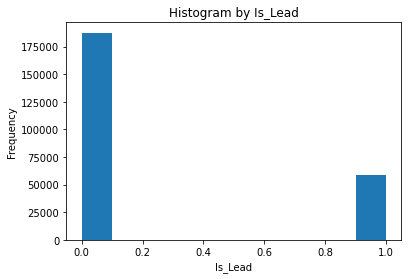

In [43]:
new_df['Is_Lead'].plot.hist()
plt.xlabel('Is_Lead')
plt.title('Histogram by Is_Lead')
plt.show()

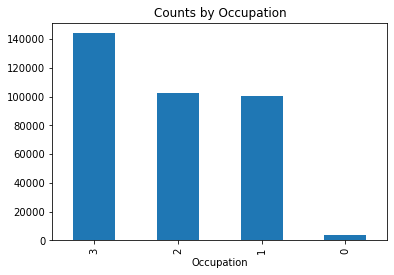

In [44]:
new_df['Occupation'].value_counts().plot(kind='bar')
plt.xlabel('Occupation')
plt.title('Counts by Occupation')
plt.show()

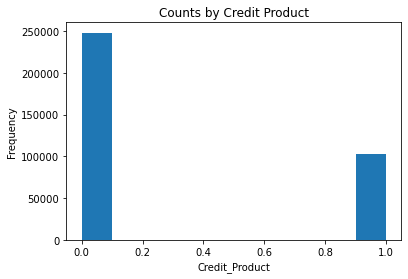

In [45]:
new_df['Credit_Product'].plot.hist()
plt.xlabel('Credit_Product')
plt.title('Counts by Credit Product')
plt.show()

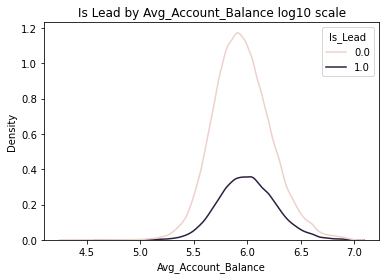

In [46]:
temp_df = pd.DataFrame()

temp_df['Is_Lead'] = new_df['Is_Lead']
## store the log values of Avg Account Balance for easier processing
temp_df['Avg_Account_Balance'] = np.log10(new_df['Avg_Account_Balance'])

sns.kdeplot(data=temp_df, x='Avg_Account_Balance', hue='Is_Lead')
plt.xlabel('Avg_Account_Balance')
plt.title('Is Lead by Avg_Account_Balance log10 scale')
plt.show()

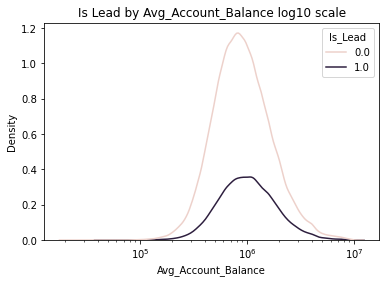

In [47]:
sns.kdeplot(data=new_df, x='Avg_Account_Balance', log_scale=True, hue='Is_Lead')
plt.xlabel('Avg_Account_Balance')
plt.title('Is Lead by Avg_Account_Balance log10 scale')
plt.show()

In [48]:
train_new = new_df[new_df.data_file == 'train']
train_new.drop(columns=['data_file'], inplace=True)
train_new.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0.0,0.0
1,0,30,27,2,0,32,0,581988,0.0,0.0
2,0,56,18,3,2,26,0,1484315,1.0,0.0
3,1,34,20,2,0,19,0,470454,0.0,0.0
4,0,30,32,2,0,33,0,886787,0.0,0.0


In [49]:
train_new.shape

(245725, 10)

In [50]:
test_new = new_df[new_df.data_file == 'test']
test_new.drop(columns=['data_file'], inplace=True)
test_new.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,1,29,4,1,0,25,1,742366,0.0,NaN
1,1,43,18,1,1,49,0,925537,0.0,NaN
2,1,31,20,2,0,14,0,215949,0.0,NaN
3,1,29,22,1,0,33,0,868070,0.0,NaN
4,0,29,20,1,0,19,0,657087,0.0,NaN


In [51]:
test_new.shape

(105312, 10)